<a href="https://colab.research.google.com/github/pedrohcaminha/projeto1DS/blob/main/projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas e dados

### Importando bibliotecas

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

### Importando dados

In [2]:
url = 'https://raw.githubusercontent.com/pedrohcaminha/projeto1DS/main/data.csv'
data = pd.read_csv(url, sep='\t')
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition,day
10247,8:51 PM,43 F,28 F,56 %,SSW,15 mph,0 mph,30.10 in,0.0 in,Mostly Cloudy,365
10248,9:51 PM,43 F,28 F,56 %,SW,7 mph,0 mph,30.08 in,0.0 in,Mostly Cloudy,365
10249,10:46 PM,45 F,28 F,53 %,SSW,15 mph,22 mph,30.06 in,0.0 in,Cloudy,365
10250,10:51 PM,44 F,28 F,53 %,SSW,15 mph,22 mph,30.06 in,0.0 in,Cloudy,365
10251,11:51 PM,45 F,28 F,52 %,SW,14 mph,0 mph,30.02 in,0.0 in,Cloudy,365


# Tratamento de dados faltantes

### Verificando se existem dados ausentes

In [3]:
data.isnull().sum()

Time            0
Temperature     0
Dew Point       0
Humidity        0
Wind            5
Wind Speed      0
Wind Gust       0
Pressure        0
Preciptation    0
Condition       1
day             0
dtype: int64

### Como existem poucos dados ausentes, as linhas serão removidas

In [4]:
data.shape

(10252, 11)

In [5]:
data.dropna(inplace=True)
data.shape

(10246, 11)

# Realizando correções de Tipos

### Verificando os tipos


In [6]:
data.dtypes

Time            object
Temperature     object
Dew Point       object
Humidity        object
Wind            object
Wind Speed      object
Wind Gust       object
Pressure        object
Preciptation    object
Condition       object
day              int64
dtype: object

### Corrigindo os dados de tempo

In [7]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 12, 31)
delta = datetime.timedelta(hours=24)

timeseries = []
last_day = 1
for index, row in data.iterrows():
  if(last_day != row['day']):
    start_date += delta
    last_day = row['day']
  timeseries.append(str(start_date) + " " + row['Time'])
data['Time'] = timeseries
data['Time'] =  pd.to_datetime(data['Time'], infer_datetime_format=True)
data.drop(columns=['day'], inplace=True)
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40 F,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40 F,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40 F,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39 F,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38 F,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de temperatura

In [8]:
Temperature = []
for index, row in data.iterrows():
  Temperature.append(int(''.join(filter(str.isdigit, row['Temperature']))))
data['Temperature'] = Temperature
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25 F,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26 F,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25 F,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23 F,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23 F,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de ponto de condensação da água

In [9]:
dew = []
for index, row in data.iterrows():
  dew.append(int(''.join(filter(str.isdigit, row['Dew Point']))))
data['Dew Point'] = dew
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,55 %,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,58 %,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,55 %,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,53 %,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,55 %,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de humidade

In [10]:
Humidity = []
for index, row in data.iterrows():
  Humidity.append(int(''.join(filter(str.isdigit, row['Humidity'])))/100)
data['Humidity'] = Humidity
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14 mph,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17 mph,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16 mph,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16 mph,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14 mph,23 mph,29.66 in,0.0 in,Cloudy


### Verificando os dados de direcao do vento (nao precisa de correcao)

In [11]:
data['Wind'].value_counts()

S       1306
NE      1089
NW       872
ENE      783
W        679
SSW      648
SW       615
WNW      611
NNW      556
N        550
WSW      420
SSE      419
CALM     404
E        388
NNE      349
SE       229
ESE      199
VAR      129
Name: Wind, dtype: int64

In [12]:
data['Wind'] = data['Wind'].astype('category')

### Corrigindo os dados de velocidade do vento

In [13]:
Speed = []
for index, row in data.iterrows():
  Speed.append(int(''.join(filter(str.isdigit, row['Wind Speed']))))
data['Wind Speed'] = Speed
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24 mph,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22 mph,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28 mph,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0 mph,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23 mph,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de velocidade da rajada do vento

In [14]:
Gust = []
for index, row in data.iterrows():
  Gust.append(int(''.join(filter(str.isdigit, row['Wind Gust']))))
data['Wind Gust'] = Gust
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63 in,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64 in,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64 in,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66 in,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66 in,0.0 in,Cloudy


### Corrigindo os dados de pressao

In [15]:
Pressure = []
for index, row in data.iterrows():
  Pressure.append(int(''.join(filter(str.isdigit, row['Pressure'])))/100)
data['Pressure'] = Pressure
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63,0.0 in,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64,0.0 in,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64,0.0 in,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66,0.0 in,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66,0.0 in,Cloudy


### Corrigindo os dados de precipitacao

In [16]:
Preciptation = []
for index, row in data.iterrows():
  Preciptation.append(int(''.join(filter(str.isdigit, row['Preciptation'])))/100)
data['Preciptation'] = Preciptation
data.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Preciptation,Condition
0,2020-01-01 00:51:00,40,25,0.55,W,14,24,29.63,0.0,Cloudy
1,2020-01-01 01:51:00,40,26,0.58,W,17,22,29.64,0.0,Cloudy
2,2020-01-01 02:51:00,40,25,0.55,W,16,28,29.64,0.0,Mostly Cloudy
3,2020-01-01 03:51:00,39,23,0.53,W,16,0,29.66,0.0,Cloudy
4,2020-01-01 04:51:00,38,23,0.55,W,14,23,29.66,0.0,Cloudy


### Verificando os dados de condicoes

In [17]:
data['Condition'].value_counts()

Mostly Cloudy              2829
Cloudy                     2028
Fair                       1904
Partly Cloudy              1266
Light Rain                  829
Fog                         197
Mostly Cloudy / Windy       144
Rain                        127
Light Rain / Windy          123
Light Drizzle               116
Fair / Windy                110
Partly Cloudy / Windy        84
Cloudy / Windy               75
Heavy Rain                   52
Light Snow                   38
Haze                         35
Light Rain with Thunder      31
Thunder in the Vicinity      28
Drizzle and Fog              28
T-Storm                      28
Thunder                      26
Light Snow / Windy           23
Heavy Rain / Windy           22
Rain / Windy                 21
Wintry Mix                   12
Snow / Windy                 10
Light Drizzle / Windy        10
Heavy T-Storm / Windy         8
Heavy T-Storm                 8
Snow and Sleet / Windy        7
T-Storm / Windy               5
Haze / W

In [18]:
data['Condition'] = data['Condition'].astype('category')

### Verificando os dados após as correcoes

In [19]:
data.dtypes

Time            datetime64[ns]
Temperature              int64
Dew Point                int64
Humidity               float64
Wind                  category
Wind Speed               int64
Wind Gust                int64
Pressure               float64
Preciptation           float64
Condition             category
dtype: object

# Analise de dados Univariados

## Temperatura

Descricao da temperatura

In [20]:
data['Temperature'].describe()

count    10246.000000
mean        58.203592
std         16.487466
min         15.000000
25%         45.000000
50%         57.000000
75%         73.000000
max         97.000000
Name: Temperature, dtype: float64

Temperaturas medias mensais ao longo do ano

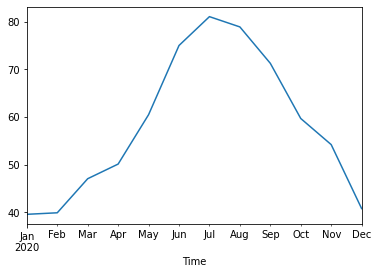

In [21]:
data.resample('M', on='Time').mean()['Temperature'].plot()

Distribuicao das temperaturas ao longo do ano de acordo com os meses

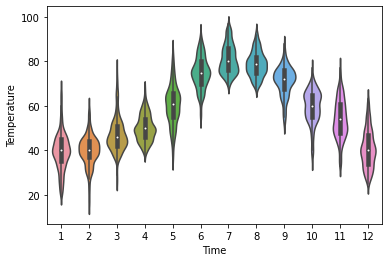

In [22]:
sns.violinplot(x=data['Time'].dt.month, y=data['Temperature'] )

## Dew Point

Descricao do ponto de condensação da água

In [23]:
data['Dew Point'].describe()

count    10246.000000
mean        43.948175
std         17.607824
min          0.000000
25%         31.000000
50%         43.000000
75%         60.000000
max         75.000000
Name: Dew Point, dtype: float64

Pontos de condensação da água medios mensais ao longo do ano

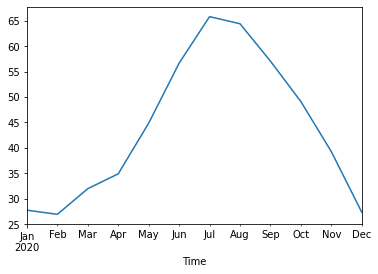

In [24]:
data.resample('M', on='Time').mean()['Dew Point'].plot()

Distribuicao dos pontos de condensação da água ao longo do ano de acordo com os meses

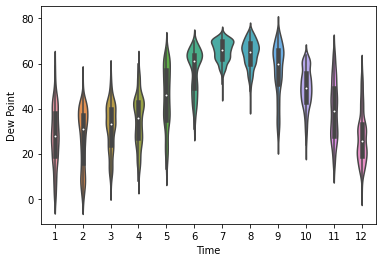

In [25]:
sns.violinplot(x=data['Time'].dt.month, y=data['Dew Point'] )

## Humidity

Descricao da Humidade

In [26]:
data['Humidity'].describe()

count    10246.000000
mean         0.621752
std          0.191933
min          0.140000
25%          0.470000
50%          0.630000
75%          0.790000
max          1.000000
Name: Humidity, dtype: float64

Humidades medias mensais ao longo do ano

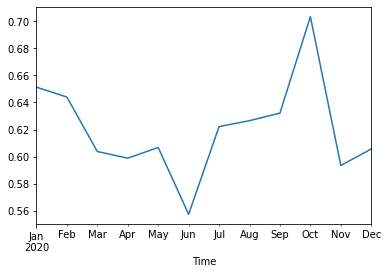

In [27]:
data.resample('M', on='Time').mean()['Humidity'].plot()

Distribuicao das humidades ao longo do ano de acordo com os meses

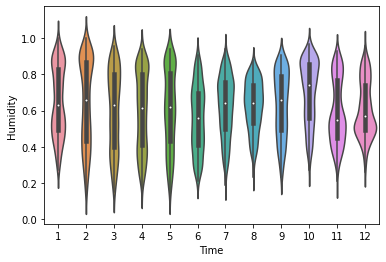

In [28]:
sns.violinplot(x=data['Time'].dt.month, y=data['Humidity'] )

## Wind

Descricao do vento

In [29]:
data['Wind'].describe()

count     10246
unique       18
top           S
freq       1306
Name: Wind, dtype: object

Contagem das direçoes dos ventos

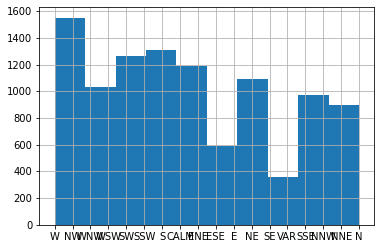

In [64]:
data['Wind'].hist()

## Wind speed


Descricao da velocidade do vento

In [65]:
data['Wind Speed'].describe()

count    10246.000000
mean        10.654792
std          5.728815
min          0.000000
25%          7.000000
50%          9.000000
75%         14.000000
max         53.000000
Name: Wind Speed, dtype: float64

velocidades do vento medias mensais ao longo do ano

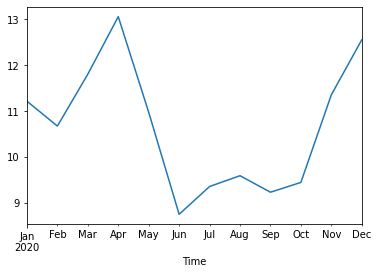

In [66]:
data.resample('M', on='Time').mean()['Wind Speed'].plot()

Distribuicao das velocidades do vento ao longo do ano de acordo com os meses

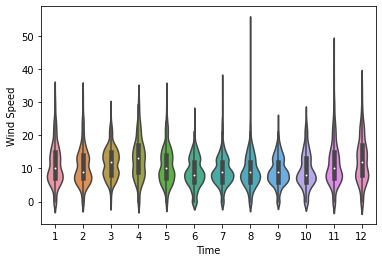

In [69]:
sns.violinplot(x=data['Time'].dt.month, y=data['Wind Speed'] )

## Wind gust



Descricao da velocidade de rajada do vento

In [70]:
data['Wind Gust'].describe()

count    10246.000000
mean         4.830470
std         10.928297
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         69.000000
Name: Wind Gust, dtype: float64

velocidades de rajada do vento medias mensais ao longo do ano

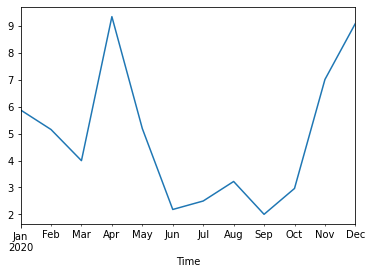

In [71]:
data.resample('M', on='Time').mean()['Wind Gust'].plot()

Distribuicao das velocidades de rajada do vento ao longo do ano de acordo com os meses

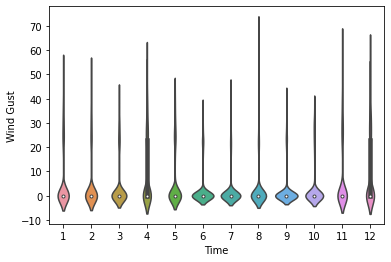

In [72]:
sns.violinplot(x=data['Time'].dt.month, y=data['Wind Gust'] )

## Pressure



Descricao da pressao

In [73]:
data['Pressure'].describe()

count    10246.000000
mean        29.990655
std          0.381287
min          0.000000
25%         29.840000
50%         29.980000
75%         30.150000
max         30.740000
Name: Pressure, dtype: float64

pressoes medias mensais ao longo do ano

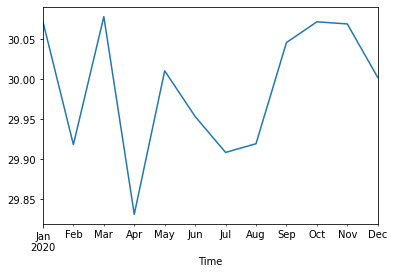

In [74]:
data.resample('M', on='Time').mean()['Pressure'].plot()

Distribuicao das pressoes ao longo do ano de acordo com os meses

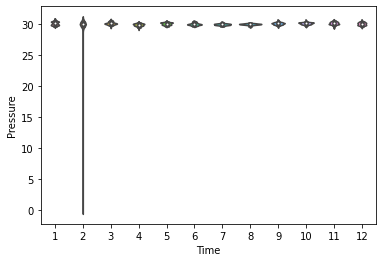

In [75]:
sns.violinplot(x=data['Time'].dt.month, y=data['Pressure'] )

Removendo esse outlier de pressao (erro) através da insercao da media

In [80]:
pressao = []
for index, row in data.iterrows():
  if(row['Pressure']) < 20:
    pressao.append(data['Pressure'].mean())
  else:
    pressao.append(row['Pressure'])
data['Pressure'] = pressao

Verificando correcao

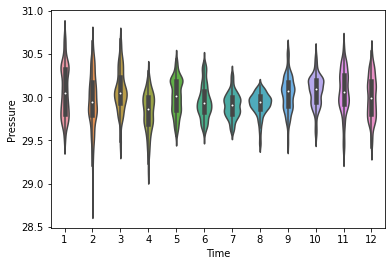

In [81]:
sns.violinplot(x=data['Time'].dt.month, y=data['Pressure'] )

## Preciptation



Descricao da precipitacao

In [83]:
data['Preciptation'].describe()

count    10246.000000
mean         0.000641
std          0.004098
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.130000
Name: Preciptation, dtype: float64

precipitacoes medias mensais ao longo do ano

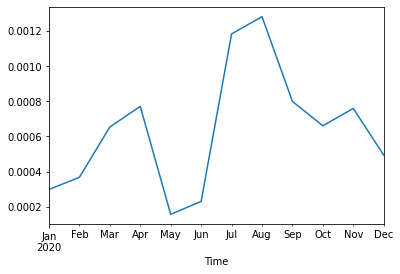

In [84]:
data.resample('M', on='Time').mean()['Preciptation'].plot()

Distribuicao das precipitacoes ao longo do ano de acordo com os meses

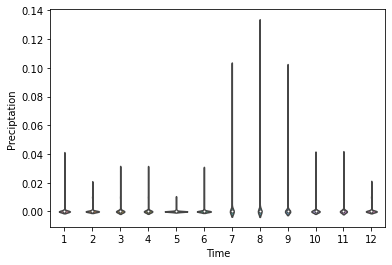

In [86]:
sns.violinplot(x=data['Time'].dt.month, y=data['Preciptation'] )

## Condition

Descricao da condicao

In [87]:
data['Condition'].describe()

count             10246
unique               40
top       Mostly Cloudy
freq               2829
Name: Condition, dtype: object

Contagem das condicoes

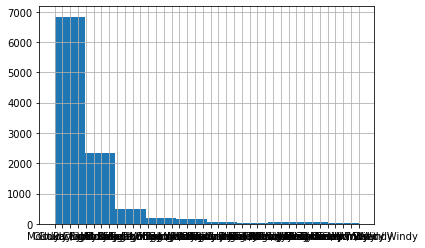

In [88]:
data['Condition'].hist()